# Case Study on Measures of Central Tendency and Dispersion
    

An Institution wishes to find out their student’s ability in maths, reading and writing skills. The Institution wants to do an exploratory study to check the following information.

    1. Find out how many males and females participated in the test.

    2. What do you think about the students' parental level of education?

    3. Who scores the most on average for math, reading and writing based on

        ● Gender

        ● Test preparation course

    4. What do you think about the scoring variation for math, reading and writing based on

        ● Gender

        ● Test preparation course

    5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

## Import StudentsPerformance data

In [102]:
stdData = pd.read_csv("StudentsPerformance.csv")

In [103]:
#Checking null values and columns in the data set

In [104]:
stdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [105]:
stdData.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


## Plotting genderwise particiaption plot

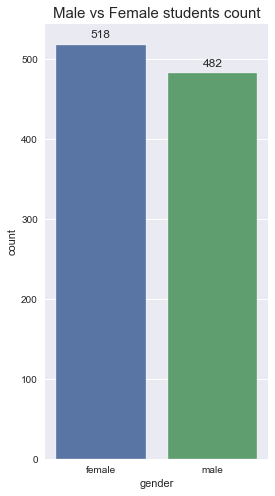

In [123]:
plt.figure(figsize=(4, 8))
plt.style.use("seaborn")
ax = sns.countplot(x="gender",data=stdData)
plt.title("Male vs Female students count",size=15);
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### There are 518 female and 482 male students. More female students took the test

## Plotting student's parental level of education

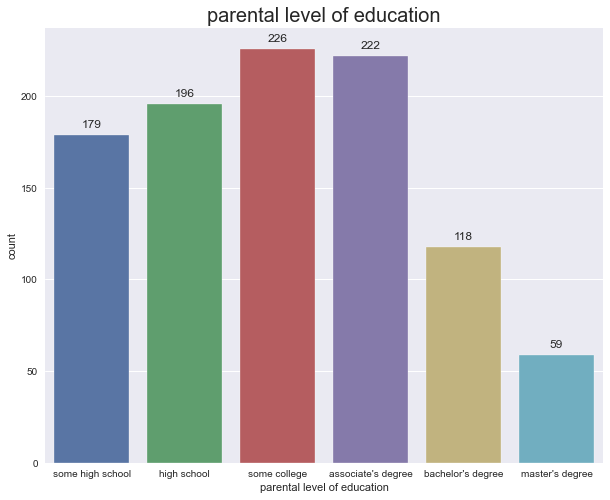

In [107]:

plt.figure(figsize=(10, 8))
plt.style.use("seaborn")
ax = sns.countplot(x="parental level of education",data=stdData)
plt.title("parental level of education",size=20);
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

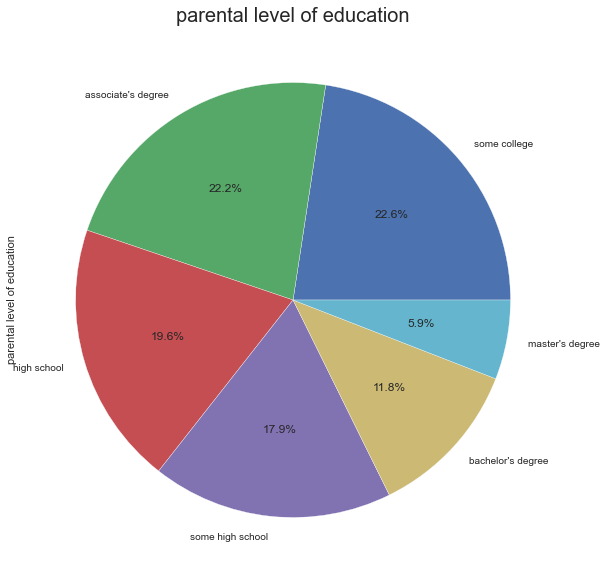

In [108]:
plt.figure(figsize=(10, 10))
plt.style.use("seaborn")
plt.title("parental level of education",size=20);
stdParentEdData = stdData["parental level of education"].value_counts()
stdParentEdData.plot.pie(autopct="%.1f%%");

#### 22.6% of the parents went to some college and 22.2% got associate degree.Only 5.9% of parents hold a master degree. In total 62.5% of parents are with an education level higher than "high school"

## Average scoring for math, reading and writing based on gender

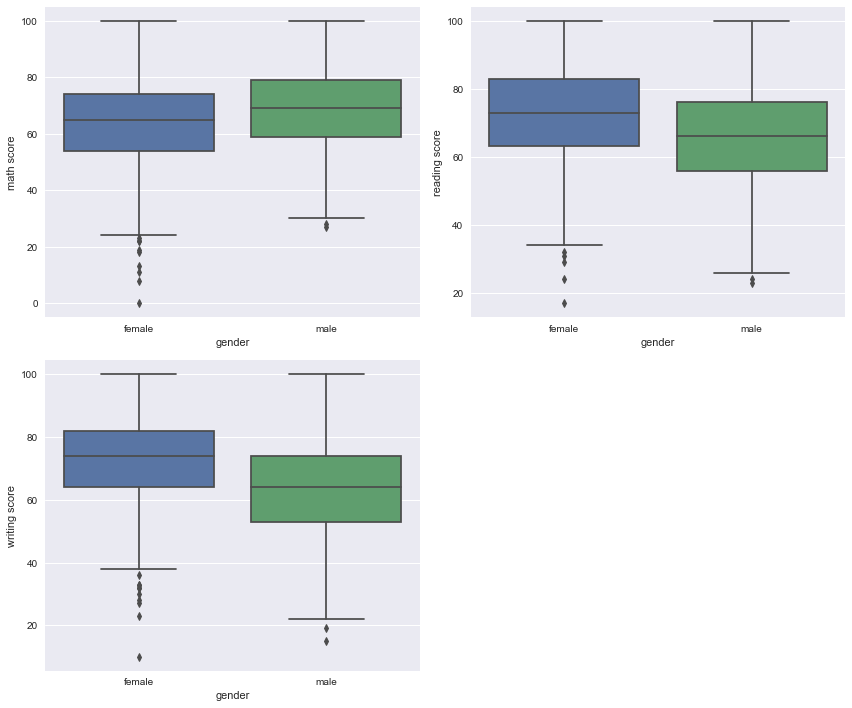

In [109]:
plt.figure(figsize=(12, 10))
plt.subplot(221)
sns.boxplot(x="gender", y="math score",data=stdData)
plt.subplot(222)
sns.boxplot(x="gender", y="reading score",data=stdData)
plt.subplot(223)
sns.boxplot(x="gender", y="writing score",data=stdData)

plt.tight_layout()

As per the above box plot there are outliners in the data for maths, reading and writing. Also, the test score is a discrete data, median will be the best fit for calculating central tendency

In [110]:
stdData.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [111]:
stdData.groupby('gender').median()

,math score,reading score,writing score
gender,,,
female,65,73,74
male,69,66,64


#### Considering mean and median, male students performed better in mathematics with 69 as the median value  whereas female students perfomed better in Reading and Writing. The median value for Reading and Writing for female students are 73 and 74 respectively

## Average scoring for math, reading and writing based on test preparation

In [112]:

stdData["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [113]:
stdData.groupby('test preparation course').describe()

math score                                         \
                             count      mean        std   min   25%   50%   
test preparation course                                                     
completed                    358.0  69.96648  14.521847  23.0  61.0  70.0   
none                         642.0  63.78972  15.705689   0.0  54.0  64.0   

                                     reading score             ...        \
                          75%    max         count       mean  ...   75%   
test preparation course                                        ...         
completed                79.0  100.0         358.0  74.175978  ...  84.0   
none                     74.0  100.0         642.0  66.417445  ...  76.0   

                               writing score                              \
                           max         count       mean        std   min   
test preparation course                                                    
completed                100.0         358.0  74.684358  13.236412  36.0   
none                     100.0         642.0  64.457944  15.041667  10.0   

                                                   
                          25%   50%    75%    max  
test preparation course                            
completed                67.0  76.0  83.75  100.0  
none                     54.0  65.0  74.00  100.0  

[2 rows x 24 columns]

In [114]:
stdData.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [115]:
stdData.groupby('test preparation course').median()

,math score,reading score,writing score
test preparation course,,,
completed,70,75,76
none,64,67,65


#### Considering mean and median,students who completed the test preparation performed better in all the streams. The median value for Math, Reading and Writing for the students who completed test preparation students are 70, 75 and 76 respectively

## Scoring variation for math, reading and writing based on gender

In [116]:
stdData.groupby('gender').std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


#### Male students showed lower variation in all the streams compared to female students. The variation in mathematics for female students is a bit higher comaring to other streams.

## Scoring variation for math, reading and writing based on test preparation

In [117]:
stdData.groupby('test preparation course').std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


#### Students who completed the test preparation showed lower variation in all the streams compared to students who didn't completed the test preparation. students.

## Find top 25% of students based on their maths score

In [124]:
#finding top 25% students based math score

In [125]:
stdData.sort_values('math score',ascending=False).head(int(stdData.shape[0]*.25))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


In [126]:
#Quartile 3 and above

In [127]:
stdData["math score"].describe()

count    1000.000000
mean       66.001000
std        15.569567
min         0.000000
25%        57.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

In [128]:
stdData[stdData["math score"]>77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [129]:
stdData[stdData["math score"]>=77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


#### The top 25% of the student can be identified using the quartiles. There are 231 students who scored above the third quartile value 77 for the mathematics.This count is slightly lesser than 25%, but if we include the third quartile value, the number of students crosses slightly above 25%.